In [1]:
import krakenex
from pykrakenapi import KrakenAPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
import functools
from functools import reduce

%matplotlib inline

In [2]:
api = krakenex.API()
k = KrakenAPI(api)

In [66]:
def pull_data(ticker, interval = 1440):
    '''
    Pulls data for different cryptos from Kraken API.
    Interval is on per minute basis, defaulted to daily prices.
    '''
    ticker_str = '_'+str(ticker)
    
    ticker, last = k.get_ohlc_data(str(ticker)+'USD', interval)
    
    ticker['log_high'] = np.log(ticker['high'])
    ticker['log_low'] = np.log(ticker['low'])
    ticker['log_vwap'] = np.log(ticker['vwap'])
    
    col_names = ['time']
    
    for i in ticker.columns:
        if i != 'time':
            col_names.append(i+ticker_str)
    
    ticker.columns = col_names
    
    now = datetime.datetime.now()
    
    print(f"Pulled {ticker_str} at {now}")
    
    return ticker

In [55]:
def merge_data(dfs):
    '''
    Merge dataframes on the time column to have all cyrptos in one dataframe.
    '''
    df_merged = reduce(lambda left, right: pd.merge(left, right,
                                                   on=['time'],
                                                   how='outer'),
                      dfs)
    
    df_merged.index = dfs[0].index
    df_merged = df_merged.drop(columns=['time'])
    
    return df_merged

In [27]:
btc = pull_data('BTC')

C:\Users\pam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
btc.head()

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC
dtime,,,,,,,,,,,
2020-09-18,1600387200,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588
2020-09-17,1600300800,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580
2020-09-16,1600214400,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412
2020-09-14,1600041600,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929


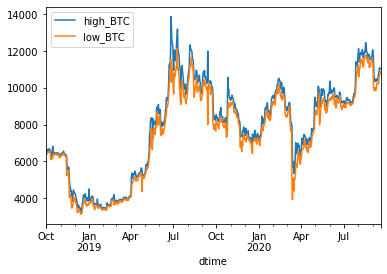

In [7]:
btc.plot(y=['high_BTC', 'low_BTC'])

In [29]:
eth = pull_data('ETH')

In [30]:
eth.head()

,time,open_ETH,high_ETH,low_ETH,close_ETH,vwap_ETH,volume_ETH,count_ETH,log_high_ETH,log_low_ETH,log_vwap_ETH
dtime,,,,,,,,,,,
2020-09-18,1600387200,389.39,392.39,382.41,384.35,385.81,19902.523427,5527,5.972256,5.946493,5.955345
2020-09-17,1600300800,365.00,394.68,363.29,389.39,382.00,83100.620687,16918,5.978075,5.895201,5.945421
2020-09-16,1600214400,363.90,373.78,355.11,364.99,364.02,70775.941823,13151,5.923667,5.872428,5.897209
2020-09-15,1600128000,377.14,382.48,362.50,364.09,372.49,73932.668096,14684,5.946676,5.893024,5.920210
2020-09-14,1600041600,366.51,384.15,356.15,377.14,370.47,71200.016565,13978,5.951033,5.875352,5.914772


In [31]:
ltc = pull_data('LTC')

C:\Users\pam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
ltc.head()

,time,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,
2020-09-18,1600387200,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,1600300800,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,1600214400,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,1600128000,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,1600041600,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [33]:
dfs = [btc, eth, ltc]

In [56]:
df = merge_data(dfs)

In [57]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [45]:
df.to_csv('crypto_prices.csv')

In [52]:
df = pd.read_csv('crypto_prices.csv')

In [53]:
df.head()

,dtime,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
0,2020-09-18,1600387200,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
1,2020-09-17,1600300800,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2,2020-09-16,1600214400,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
3,2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
4,2020-09-14,1600041600,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [54]:
df.set_index('dtime')

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,1600387200,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,1600300800,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,1600214400,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,1600041600,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-04,1538611200,6463.8,6598.9,6461.0,6547.4,6550.8,1940.218975,5664,8.794658,8.773539,...,57.16,58.84,56.52,57.97,58.12,8468.435950,607,4.074822,4.034595,4.062510
2018-10-03,1538524800,6497.7,6521.1,6397.6,6463.9,6470.3,4959.145443,8269,8.782798,8.763678,...,59.14,59.20,56.50,57.23,57.58,8337.848361,1060,4.080922,4.034241,4.053175
2018-10-02,1538438400,6574.5,6597.0,6436.2,6500.0,6529.6,2458.395238,4704,8.794370,8.769694,...,60.45,61.46,58.67,59.15,60.15,4359.474024,874,4.118387,4.071929,4.096841


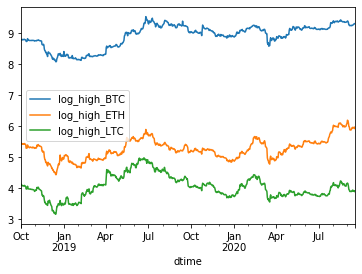

In [58]:
df.plot(y=['log_high_BTC', 'log_high_ETH', 'log_high_LTC'])